Machine Learning basics


In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [351]:
df = pd.read_csv("height-weight.csv")

In [352]:
df.head()     

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


2 dimensions (1 independant and 1 dependant)


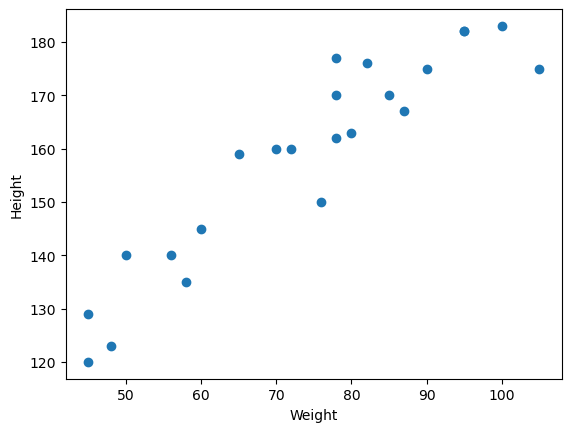

In [354]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

It is linearly correlated, that is when weight increases, height also increases
Our aim is to create a best fit line, such that the difference beetween the actual points and the predicted points is minimal.
Predicted points is given by the equation y = mx + c i.e the best fit line equation



1. Divide the features based on dependant and independant features


In [357]:
X = df[["Weight"]]
y = df["Height"]

In [358]:
## train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)


Standardizing the data
Weight and height are in different units because if the values are huge, it will take a lot of time for the gradient descent curve to converge.

In [360]:
## Standradize the data for Train Independant data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train,X_test

(array([[ 1.73689094],
        [-0.92026952],
        [ 1.4542143 ],
        [ 0.21043706],
        [-1.48562281],
        [ 1.17153765],
        [-1.6552288 ],
        [-0.80719886],
        [-0.24184557],
        [ 0.0973664 ],
        [-1.37255215],
        [-1.03334018],
        [-0.12877492],
        [ 0.88886101],
        [ 0.43657837],
        [ 0.60618436],
        [ 0.71925502],
        [ 0.32350772]]),
 array([[ 0.21043706],
        [ 0.21043706],
        [-1.6552288 ],
        [ 1.17153765],
        [-0.52452222]]))

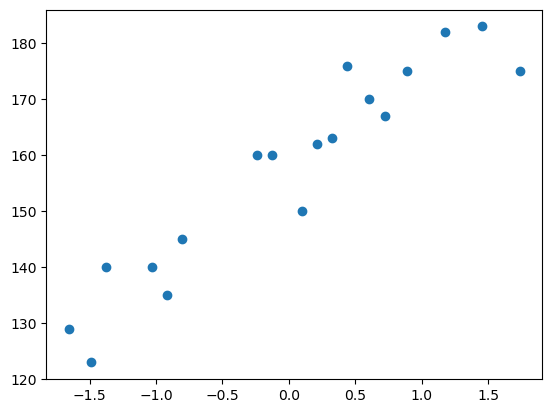

In [361]:
plt.scatter(X_train,y_train)
plt.show()

In [362]:
## Train the model ( Simple linear Regression)
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [363]:
print("The slope is: ", regressor.coef_)
print("The intercept is: ", regressor.intercept_)

The slope is:  [17.03440872]
The intercept is:  157.5


y = mx + c
=> y = 17.03 * x + 157.5 




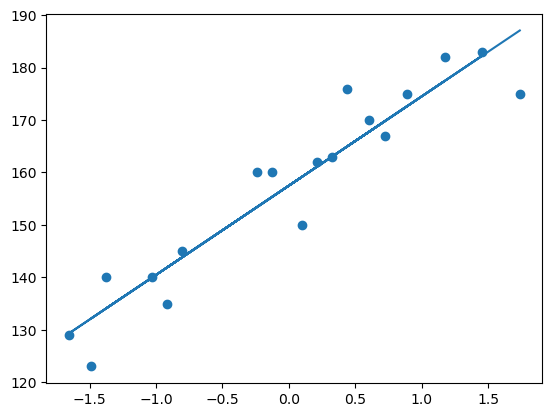

In [365]:
plt.scatter(X_train,y_train)
values = regressor.predict(X_train)
plt.plot(X_train,values)
plt.show()

Now, we try it with the test data


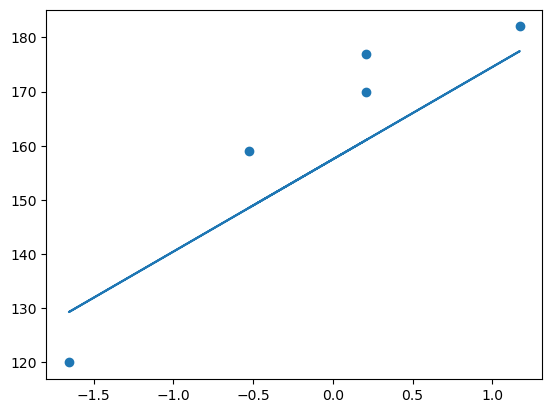

In [367]:
y_pred = regressor.predict(X_test)
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.show()

## Performace metrics
## MSE, MAE, RMSE
## R-square and adjusted R-Square

In [369]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [370]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
score

0.7769869860423441

For example,
we are predicting the weight for a random value, say 80


In [372]:
weight = 80
scaled_weight = scaler.transform([[weight]])
scaled_weight

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [373]:
predictedValue = regressor.predict(scaled_weight)
predictedValue

array([163.01076266])

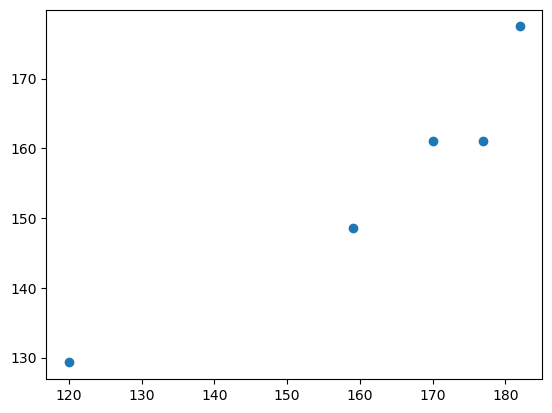

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64 [161.08467086 161.08467086 129.3041561  177.45645118 148.56507414]


15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

In [374]:
## Assumptions
## Plot a scatter for the prediction
import seaborn as sns
plt.scatter(y_test,y_pred)
plt.show()
## Residuals
print(y_test, y_pred)
residuals = y_test - y_pred
residuals


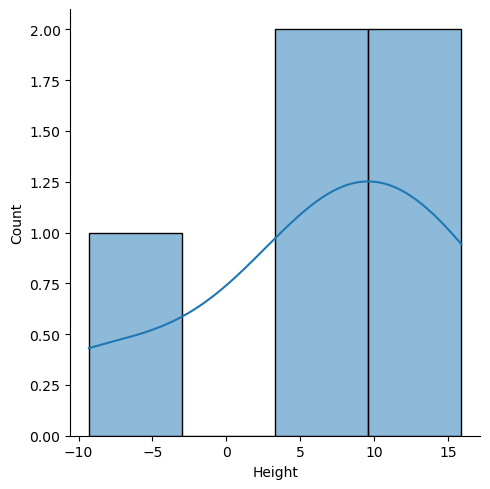

In [398]:
import seaborn as sns

sns.displot(residuals,kde=True)
plt.show()